## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [1]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pathlib

path='/content/drive/MyDrive/Mask_Dataset/'
data_dir = pathlib.Path(path)

### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [4]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

8982


In [5]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['with_mask', 'without_mask', 'mask_weared_incorrect']


[2994, 2994, 2994]


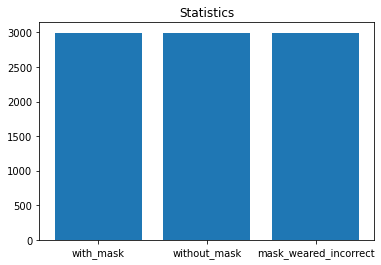

In [6]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

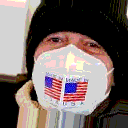

In [7]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow

path='/content/drive/MyDrive/Mask_Dataset/with_mask/100.png'
input = cv2.imread(path)

cv2_imshow(input)

cv2.waitKey()

cv2.destroyAllWindows()

# Your code

In [8]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model
print (input.shape)

(128, 128, 3)


In [9]:
# Check if all the images have same shape, else you need to resize them to some common size
# The code provided as it is above in the template will help 

In [10]:
# If the shape is variable, reshape to a common size 
# If it is same, prove it

In [11]:
# Anything else you want to plot/experiment

### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [12]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential

In [13]:
# Choose and define base model
#from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
#model.add(ResNet50(include_top = False,weights='imagenet', input_shape=(128,128,3)))
model.add(MobileNet(include_top = False,weights='imagenet', input_shape=(128,128,3)))
#model=tf.keras.applications.mobilenet.MobileNet()


17235968/17225924 [==============================] - 0s 0us/step


In [14]:
# Print base model summary and have a look at the layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
Total params: 3,228,864
Trainable params: 3,206,976
Non-trainable params: 21,888
_________________________________________________________________


In [15]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)
'''model.layers[-1].trainable= False
model.layers[-2].trainable= False
model.layers[-3].trainable= False
model.layers[-4].trainable= False
model.summary()'''


'model.layers[-1].trainable= False\nmodel.layers[-2].trainable= False\nmodel.layers[-3].trainable= False\nmodel.layers[-4].trainable= False\nmodel.summary()'

In [16]:
# Append Fully connected/custom Conv2D/Dropout/MaxPooling layers to the base model
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

In [17]:
# Add the final output layer
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [18]:
# Print your model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 1024)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 32)                131104    
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 3,360,067
Trainable params: 3,338,179
Non-

In [19]:
# Compile you model (set the parameters like loss/optimizers/metrics)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#model.compile(optimizer = "adam", loss = "SparseCategoricalCrossentropy", metrics = "accuracy")

### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

In [20]:
from keras.applications.vgg16 import preprocess_input # Change according to your base model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    #interpolation_order=1,
    dtype=None
)
# Your code 

In [21]:
# Anything else you wish to try

### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [22]:
# Your code
batch_size = 32
img_height = 128
img_width = 128


In [23]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8982 files belonging to 3 classes.
Using 7186 files for training.


In [24]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8982 files belonging to 3 classes.
Using 1796 files for validation.


In [25]:
print((train_ds))

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [26]:
class_names = train_ds.class_names
print(class_names[0])

mask_weared_incorrect


In [27]:
'''import os
X_train=[]
Y_train=[]
def Data():
     for cate in class_names:
         path=os.path.join(path,cate)
         class_num=class_names.index(cate)
         for img in os.listdir(path):
            try:
              img_array=cv2.imread(os.path.join(path,img))
              new_array=cv2.resize(img_array,(img_height,img_height))
              X_train.append(new_array)
              Y_train.append(class_num)
            except Exception as e:
              pass'''

'import os\nX_train=[]\nY_train=[]\ndef Data():\n     for cate in class_names:\n         path=os.path.join(path,cate)\n         class_num=class_names.index(cate)\n         for img in os.listdir(path):\n            try:\n              img_array=cv2.imread(os.path.join(path,img))\n              new_array=cv2.resize(img_array,(img_height,img_height))\n              X_train.append(new_array)\n              Y_train.append(class_num)\n            except Exception as e:\n              pass'

In [28]:
class_names = train_ds.class_names
print(class_names[0])

mask_weared_incorrect


### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [29]:
from keras.callbacks import ModelCheckpoint
history = model.fit(train_ds ,epochs=1, 
                    validation_data= (val_ds))
# ModelCheckpoint is helpful to save the model giving best results (brownie points)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


225/225 [==============================] - 1402s 6s/step - loss: 0.1343 - accuracy: 0.9589 - val_loss: 0.1005 - val_accuracy: 0.9822


### Evaluate the performance

In [65]:
# Plot training & validation loss/accuracy values
model.predict(val_ds)

array([[3.7215075e-05, 2.9324355e-07, 9.9996245e-01],
       [8.7795354e-04, 1.4838438e-01, 8.5073769e-01],
       [6.6141271e-05, 9.9993384e-01, 8.2862780e-13],
       ...,
       [7.7935368e-07, 1.8904282e-05, 9.9998033e-01],
       [1.7536475e-05, 9.9998248e-01, 1.5816703e-13],
       [9.9997187e-01, 1.0993496e-05, 1.7133869e-05]], dtype=float32)

In [66]:
xm=model.evaluate(val_ds)
print(xm)

57/57 [==============================] - 24s 417ms/step - loss: 0.1005 - accuracy: 0.9822
[0.10050647705793381, 0.9821826219558716]


In [105]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
arr=model.predict(val_ds)
print(arr)
min=0.0
ar=[]
for i in range(0,9):
  min=arr[i,0]
  
  for j in range(0,3):
    if(arr[i,j]>min):
      min=arr[i,j]
  
  for j in range(0,3):
    if(arr[i,j]==min):
      ar.append(j)

# print classification report

[[2.0013572e-06 1.7710018e-06 9.9999619e-01]
 [3.2578198e-05 9.9996746e-01 1.3800789e-09]
 [9.5550907e-01 4.4490889e-02 6.0059850e-09]
 ...
 [5.5276649e-04 9.9944717e-01 8.4988676e-11]
 [1.1359104e-04 9.9988639e-01 3.0963641e-12]
 [9.9919564e-01 8.0351537e-04 8.1677035e-07]]


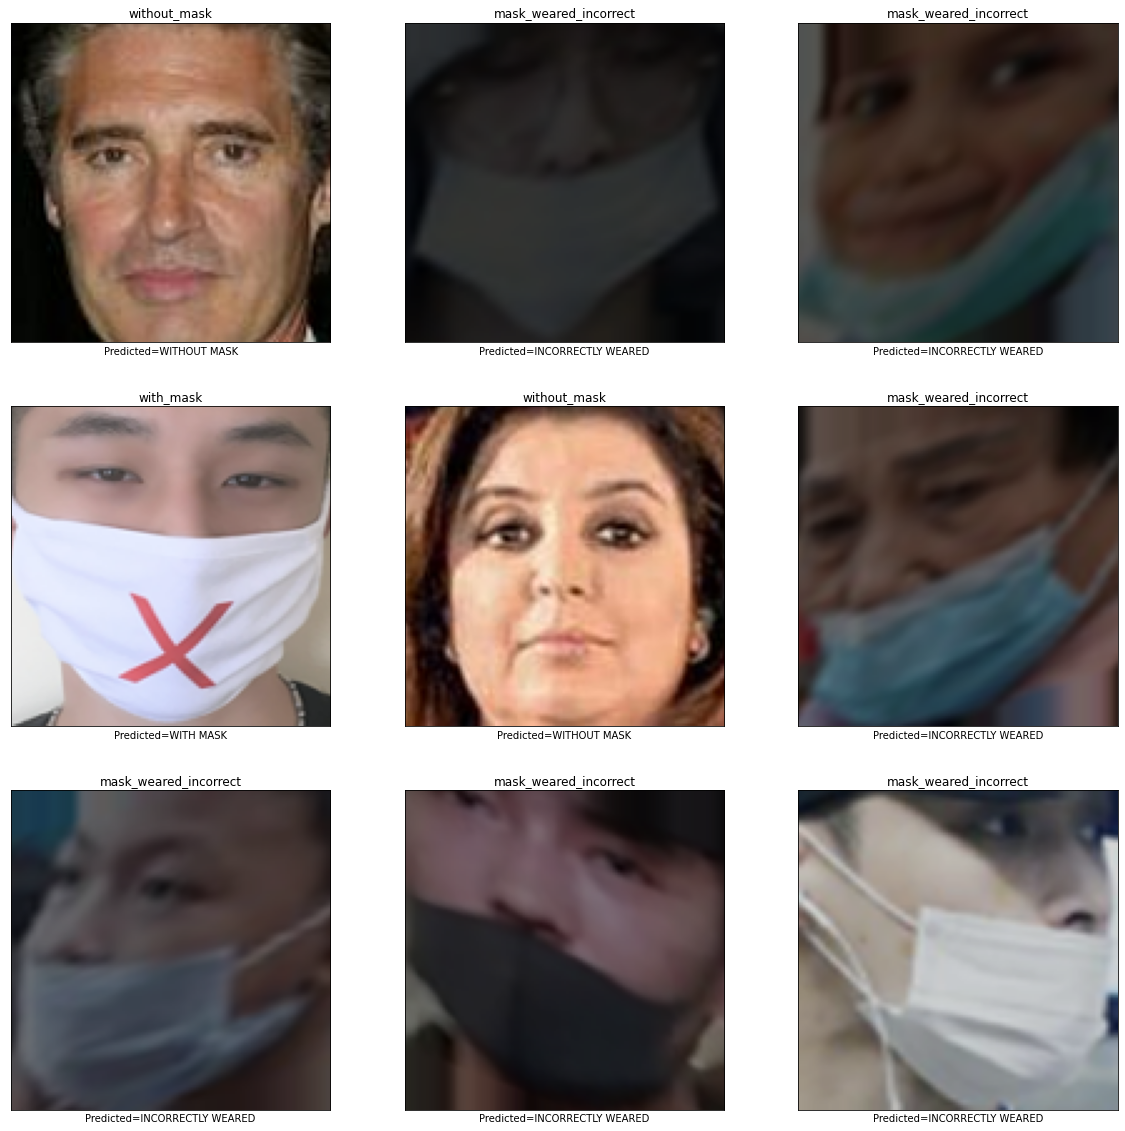

In [111]:
# Use the classification report to print precision, recall, f1-score for the three classes(optional, brownie points)
import matplotlib.pyplot as plt
import numpy as np
arry=np.array(["INCORRECTLY WEARED","WITH MASK","WITHOUT MASK"])
plt.figure(figsize=(20,20))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.xlabel(f"Predicted={arry[labels[i]]}")
plt.show()
    